## PCT Functions

In [1]:
from pct.functions import Integration 
from pct.functions import IntegrationDual 
from pct.functions import IndexedParameter
from pct.functions import Constant
from pct.functions import Sigmoid
from pct.functions import PassOn
from pct.putils import FunctionsList

In [2]:
cons = Constant(2)
integrator = Integration(gain=9, slow=10)

In [3]:
integrator.add_link(cons)

In [4]:
out = integrator()
print(out)

1.8


In [5]:
o=integrator.run(steps=10, verbose=True)

3.420 4.878 6.190 7.371 8.434 9.391 10.252 11.026 11.724 12.351 

In [6]:
import numpy as np
input=np.ones((3, 3))*2
input

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [7]:
cons = Constant(input)
integrator = Integration(gain=9, slow=10)
integrator.add_link(cons)
out = integrator()
print(out)

[[1.8 1.8 1.8]
 [1.8 1.8 1.8]
 [1.8 1.8 1.8]]


In [8]:
from pct.functions import WeightedSum
ws = WeightedSum(weights=np.ones(3))
ws.add_link(Constant(10))
ws.add_link(Constant(5))
ws.add_link(Constant(20))

In [9]:
ws.summary()

weighted_sum WeightedSum | weights [1. 1. 1.] | 0 | links  constant2 constant3 constant4 


In [10]:
print(ws.get_config())

{'type': 'WeightedSum', 'name': 'weighted_sum', 'value': 0, 'links': {0: 'constant2', 1: 'constant3', 2: 'constant4'}, 'weights': [1.0, 1.0, 1.0]}


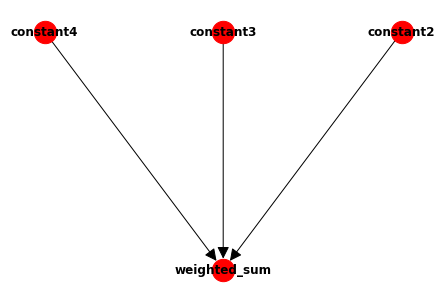

In [11]:
ws.draw()

## Nodes

In [12]:
from pct.nodes import PCTNode

In [13]:
node = PCTNode()

In [14]:
node.summary()

pctnode PCTNode
----------------------------
REF: constant5 Constant | 1 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  constant5 variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------


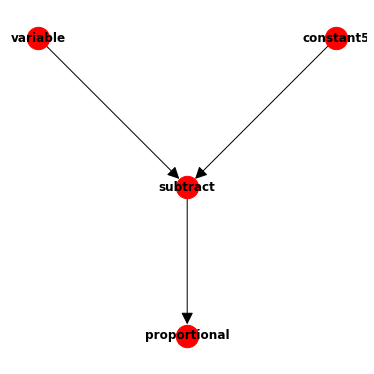

In [15]:
node.draw()

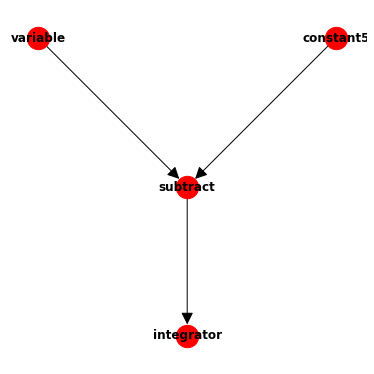

In [16]:
integ = Integration(10, 100, name="integrator", links=['subtract'], position=-1)
node.insert_function(collection = "output", function=integ)
node.draw()

In [17]:
out =node()
out

0.1

In [18]:
#FunctionsList.getInstance().report()

In [19]:
node.run(steps=10, verbose=True)

1.000 0.000 1.000 0.199 
1.000 0.000 1.000 0.297 
1.000 0.000 1.000 0.394 
1.000 0.000 1.000 0.490 
1.000 0.000 1.000 0.585 
1.000 0.000 1.000 0.679 
1.000 0.000 1.000 0.773 
1.000 0.000 1.000 0.865 
1.000 0.000 1.000 0.956 
1.000 0.000 1.000 1.047 


1.0466174574128355

## Hierarchies

In [20]:
from pct.hierarchy import PCTHierarchy

In [21]:
hpct = PCTHierarchy(2, 2, links="dense")

In [22]:
hpct.summary()

pcthierarchy PCTHierarchy
**************************
PRE: None
Level 0
level0col0 PCTNode
----------------------------
REF: weighted_sum WeightedSum | weights [1. 1.] | 0 | links  proportional2 proportional3 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  weighted_sum variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------
level0col1 PCTNode
----------------------------
REF: weighted_sum1 WeightedSum | weights [1. 1.] | 0 | links  proportional2 proportional3 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 0 | links  weighted_sum1 variable1 
OUT: proportional1 Proportional | gain 10 | 0 | links  subtract1 
----------------------------
Level 1
level1col0 PCTNode
----------------------------
REF: constant Constant | 1 
PER: weighted_sum2 WeightedSum | weights [1. 1.] | 0 | links  variable variable1 
COM: subtract2 Subtract | 0 | links  constant weighted_sum2 
OUT: proportional2 Proportional | gain 10 | 0 | links  subt

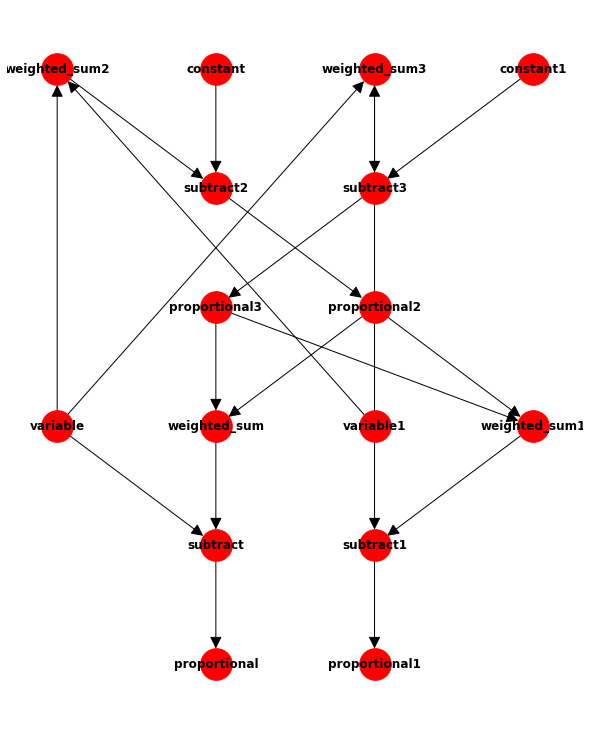

In [23]:
hpct.draw(figsize=(8, 10), node_size=1000)

In [24]:
cartpole_hierarchy = PCTHierarchy.load("cartpole.json")

TypeError: __init__() got multiple values for argument 'env_name'

In [ ]:
cartpole = FunctionsList.getInstance().get_function("CartPole-v1")
cartpole.render=True
cartpole_hierarchy.set_order("Down")
cartpole_hierarchy.draw(font_size=10, figsize=(8,12), move={'CartPole-v1': [-0.075, 0]}, node_size=1000)

In [ ]:
cartpole_hierarchy.run(200)

In [ ]:
#cartpole_hierarchy.summary()

In [ ]:
cartpole.close()

In [ ]:
pole_position_node = PCTNode.from_config({ 'name': 'pole_position_node', 
    'refcoll': {'0': {'type': 'Step', 'name': 'pole_position_reference', 'value': 0, 'upper' : 2, 'lower' :-2, 'delay' :100, 'period' :500, 'links': {}}}, 
    'percoll': {'0': {'type': 'IndexedParameter', 'name': 'pole_position', 'value': 0, 'index' :4, 'links': {0: 'CartPole-v1'}}}, 
    'comcoll': {'0': {'type': 'Subtract', 'name': 'subtract4', 'value': 0, 'links': {0: 'pole_position_reference', 1: 'pole_position'}}}, 
    'outcoll': {'0': {'type': 'Sigmoid', 'name': 'pole_position_output', 'value': 0, 'links': {0: 'subtract4'}, 'range': 0.45, 'scale': 2}}})

In [ ]:
cartpole_hierarchy.add_node(pole_position_node, level=4)

In [ ]:
# pole_angle
cartpole_hierarchy.replace_function(level=3, col=0, collection="reference", function=PassOn(name="pole_angle_reference", links=['pole_position_output']), position=0)
FunctionsList.getInstance().get_function("pole_angle_output").set_property('gain', 1.5)
cartpole_hierarchy.set_links('subtract3', 'pole_angle_reference',  'pole_angle')

# pole_velocity
cartpole_hierarchy.replace_function(level=2, col=0, collection="output", function=PassOn(name="pole_velocity_output", links=['subtract2']), position=0)

# cart_position
cartpole_hierarchy.replace_function(level=1, col=0, collection="reference", function=IntegrationDual(name="cart_position_reference", gain=90, slow=100, links=['pole_velocity_output']), position=0)
cartpole_hierarchy.add_links( 'cart_position_reference',  'cart_position')
cartpole_hierarchy.set_links('subtract1', 'cart_position_reference',  'cart_position')

# force
FunctionsList.getInstance().get_function("force").set_property('gain', -0.1)


In [ ]:
#cartpole_hierarchy.summary()

In [ ]:
cartpole_hierarchy.draw(font_size=10, figsize=(8,16), move={'CartPole-v1': [-0.075, 0] , 'pole_velocity': [-0.02, 0], 'pole_angle': [-0.025, 0]}, node_size=1000)

In [ ]:
#cartpole_hierarchy.clear_values()
#cartpole_hierarchy.save("cartpole5-added.json")

In [ ]:
cartpole_hierarchy.run(3000, verbose=False)


In [ ]:
cartpole.close()